In [30]:
import numpy as np
import pandas as pd
np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df = pd.DataFrame(class1_sample, columns = ['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 =  np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2,20)

df1 = pd.DataFrame(class2_sample, columns = ['feature1','feature2','feature3'])
df1['target'] = 0

df = pd.concat([df,df1],ignore_index = True)

df = df.sample(40)

In [31]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


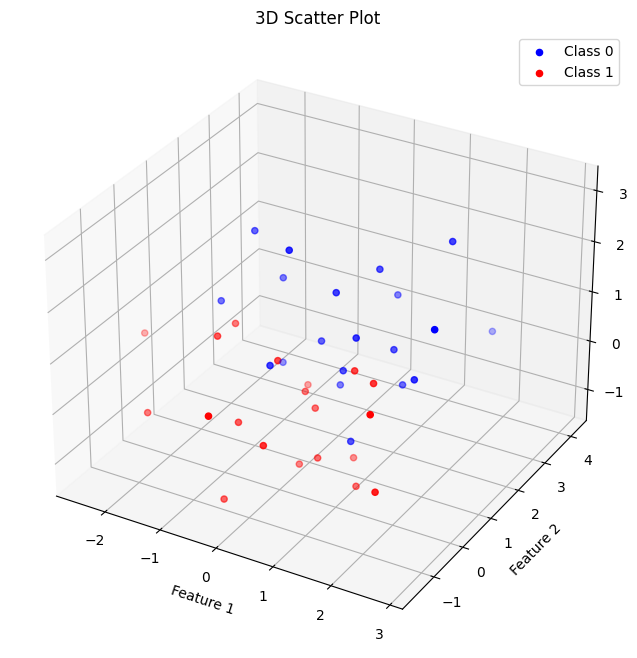

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points for each class
ax.scatter(df[df['target'] == 0]['feature1'], df[df['target'] == 0]['feature2'], df[df['target'] == 0]['feature3'], c='blue', label='Class 0')
ax.scatter(df[df['target'] == 1]['feature1'], df[df['target'] == 1]['feature2'], df[df['target'] == 1]['feature3'], c='red', label='Class 1')

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot')

# Add a legend
ax.legend()

# Show plot
plt.show()


Step1 Apply StandardScaling means that we are mean centering the data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

Step 2 Find the Covariance Matrix

In [35]:
covariance_matrix = np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
print(covariance_matrix)

[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


Step 3 Eigen Values and Eigen Vectors

In [36]:
eigen_values , eigen_vectors = np.linalg.eig(covariance_matrix)
print(eigen_values)
print(eigen_vectors)

[1.3536065  0.94557084 0.77774573]
[[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]


In [38]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [39]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 x 3,2 = 40,2  ( so from three basis vector we extracted two)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()



,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [40]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

The noisy data cloud is generated using n-Points from a 2D N ~ (0,1) these vectors are then scaled in x and y directions by a factor of sig and then rotated by pi/3 clockwise and entire data is then translated to xc

So, PCA is basically a mean Subtracted SVD, where we compute the $U$ vector which is the eigen vector of $B.B^T$ which tells about the rotation and is similar to the rotation matrix such that it rotates in the direction of maximaum variance and the $\sum$ is the singular values which describes the shape of the confidence interval

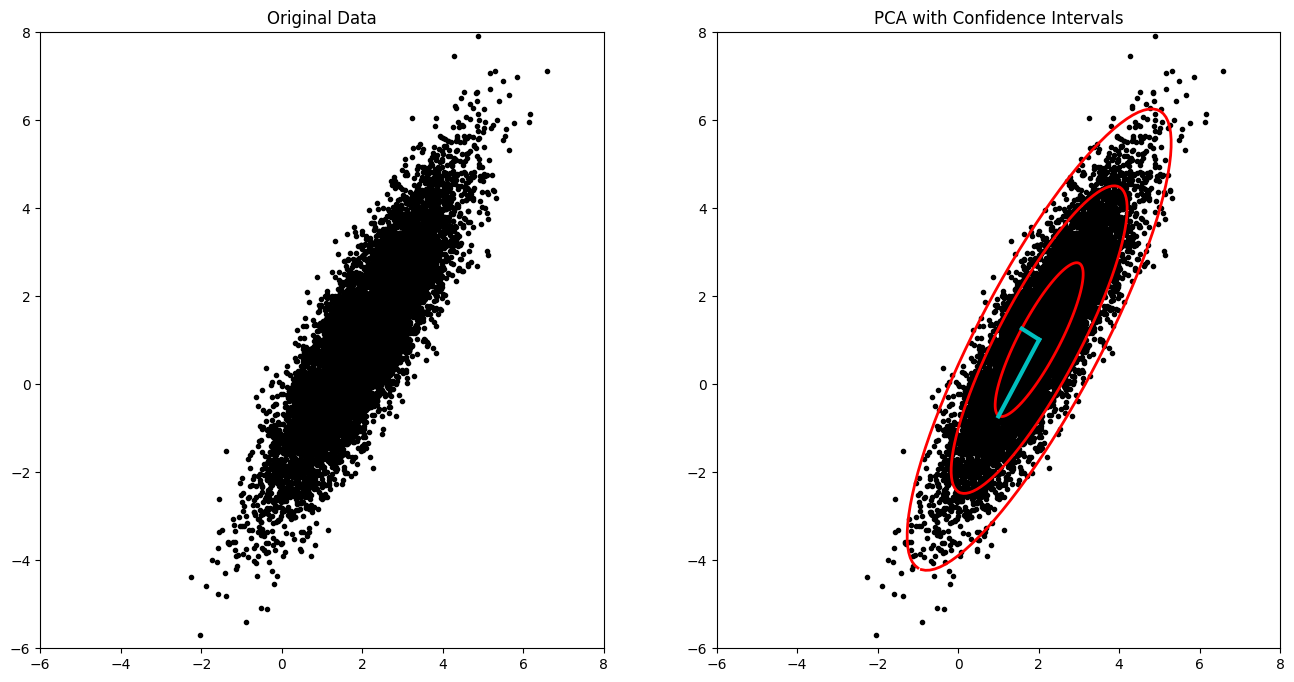

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.rcParams['figure.figsize'] = [16, 8]

# Define mean and covariance matrix
xC = np.array([2, 1])
sig = np.array([2, 0.5])

# Rotation angle
theta = np.pi / 3

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Number of data points
npoints = 10000

# Generate random data points and rotate them
X = R @ np.diag(sig) @ np.random.randn(2, npoints) + np.diag(xC) @ np.ones((2, npoints))

# Plotting
fig = plt.figure()

# Original data plot
ax1 = fig.add_subplot(121)
ax1.plot(X[0, :], X[1, :], '.', color='k')
ax1.grid(False)
ax1.set_xlim((-6, 8))
ax1.set_ylim((-6, 8))
ax1.set_title('Original Data')

# Compute principal components using SVD
Xavg = np.mean(X, axis=1)
B = X - np.tile(Xavg, (npoints, 1)).T
U, S, VT = np.linalg.svd(B / np.sqrt(npoints), full_matrices=0) # SVD on mean subtracted data


# PCA plot with confidence intervals
ax2 = fig.add_subplot(122)
ax2.plot(X[0, :], X[1, :], '.', color='k')
ax2.grid(False)
ax2.set_xlim((-6, 8))
ax2.set_ylim((-6, 8))
ax2.set_title('PCA with Confidence Intervals')

# Plot confidence intervals
theta = 2 * np.pi * np.arange(0, 1, 0.01)
Xstd = U @ np.diag(sig) @ np.array([np.cos(theta), np.sin(theta)])
ax2.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], color='r', linewidth=2)
ax2.plot(Xavg[0] + 2 * Xstd[0, :], Xavg[1] + 2 * Xstd[1, :], color='r', linewidth=2)
ax2.plot(Xavg[0] + 3 * Xstd[0, :], Xavg[1] + 3 * Xstd[1, :], color='r', linewidth=2)

# Plot principal components
for i in range(2):
    ax2.plot([Xavg[0], Xavg[0] + U[0, i] * S[i]],
             [Xavg[1], Xavg[1] + U[1, i] * S[i]], '-', color='c', linewidth=3)

plt.show()
